In [24]:
# Choose a classification dataset and normalize features.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
# Load your uploaded dataset
df = pd.read_csv("/content/Iris.csv")

if "Id" in df.columns:
    df = df.drop("Id", axis=1)

print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [26]:
from sklearn.preprocessing import LabelEncoder
X = df.drop("Species", axis=1)
y = df["Species"]

# Convert text labels to numbers
le = LabelEncoder()
y = le.fit_transform(y)

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Use KNeighborsClassifier from sklearn.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [29]:
# Experiment with Different K Values
k_values = range(1, 11)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"K = {k}, Accuracy = {acc:.4f}")

K = 1, Accuracy = 0.9667
K = 2, Accuracy = 1.0000
K = 3, Accuracy = 1.0000
K = 4, Accuracy = 1.0000
K = 5, Accuracy = 1.0000
K = 6, Accuracy = 1.0000
K = 7, Accuracy = 1.0000
K = 8, Accuracy = 1.0000
K = 9, Accuracy = 1.0000
K = 10, Accuracy = 1.0000


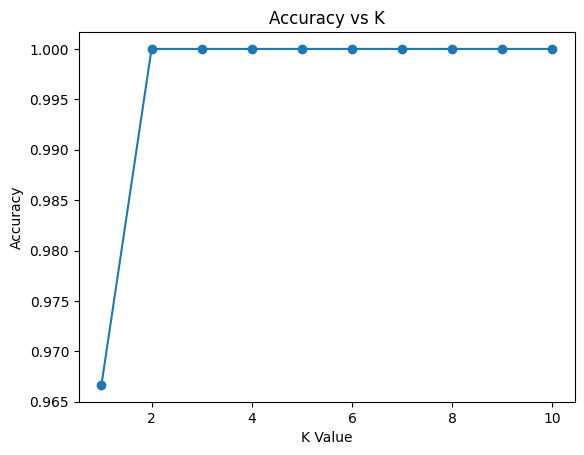

In [30]:
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()

In [31]:
# Evaluate model using accuracy, confusion matrix
best_k = k_values[np.argmax(accuracies)]
print("Best K:", best_k)

final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

print("Final Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best K: 2
Final Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


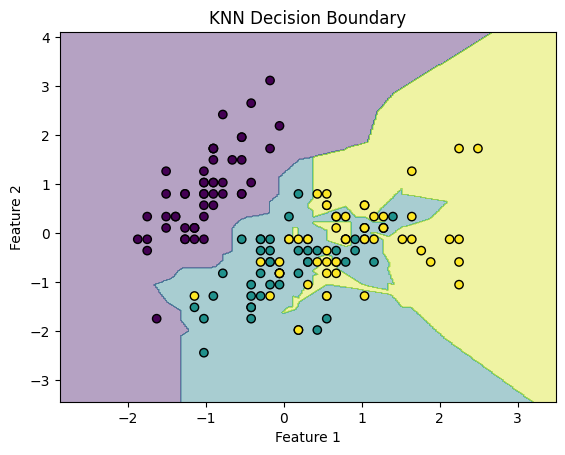

In [32]:
#Visualize decision boundaries.

# Use only first 2 features for visualization
X_vis = X_scaled[:, :2]

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.2, random_state=42
)

model_vis = KNeighborsClassifier(n_neighbors=best_k)
model_vis.fit(X_train_vis, y_train_vis)

# Create mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN Decision Boundary")
plt.show()